In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
credits = pd.read_csv("/content/drive/MyDrive/recommendation dataset/tmdb_5000_credits.csv")
movies = pd.read_csv("/content/drive/MyDrive/recommendation dataset/tmdb_5000_movies.csv")

In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
movies = movies.merge(credits,on='title')
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,movie_id_x,cast_x,crew_x,movie_id_y,cast_y,crew_y
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [ ]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


<ipython-input-7-b6ec808e413a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = movies.corr().round(2)


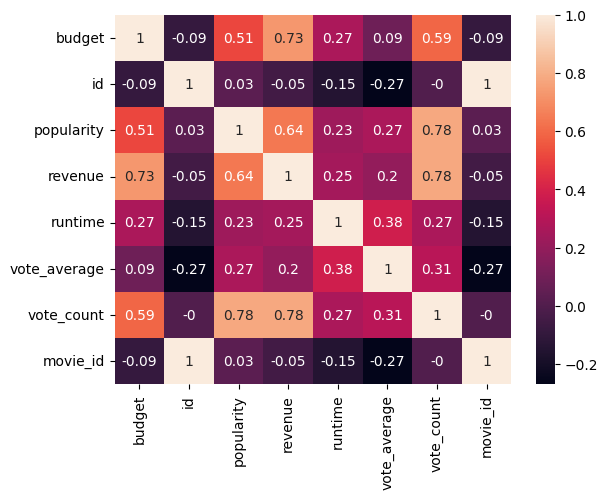

In [ ]:
matrix = movies.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

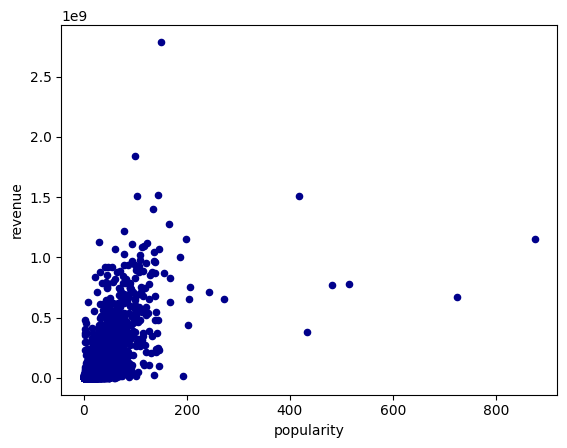

In [ ]:
ax1 = movies.plot.scatter(x='popularity',y='revenue',c='DarkBlue')

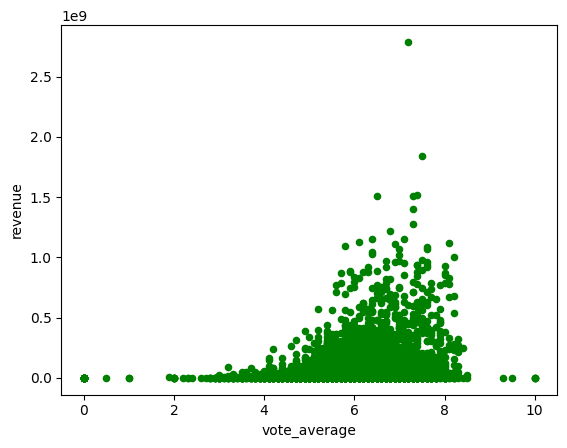

In [ ]:
ax2 = movies.plot.scatter(x='vote_average',y='revenue',c='Green')


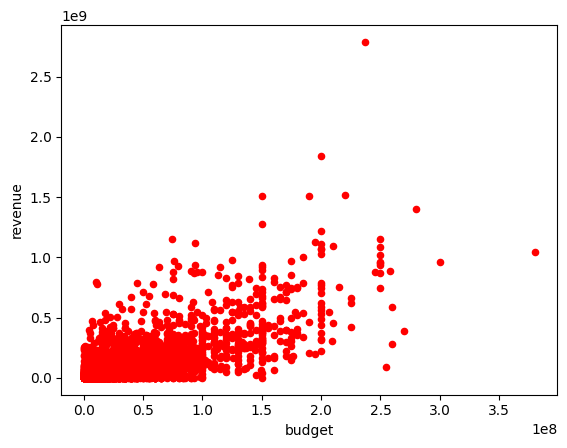

In [ ]:
ax2 = movies.plot.scatter(x='budget',y='revenue',c='Red')

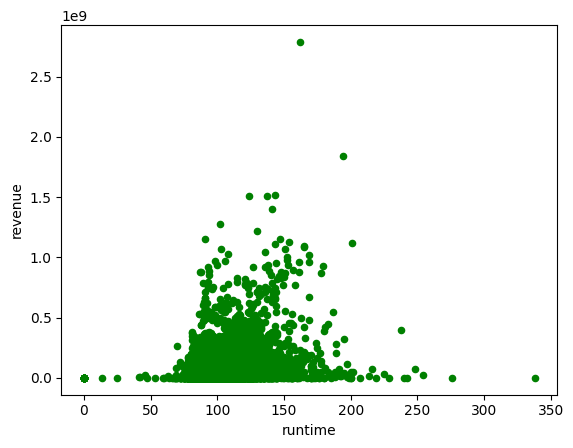

In [ ]:
ax2 = movies.plot.scatter(x='runtime',y='revenue',c='Green')

# Demographic


In [ ]:
v=movies['vote_count']
R=movies['vote_average']
C=movies['vote_average'].mean()
m=movies['vote_count'].quantile(0.70)

In [ ]:
movies['weighted_average']=((R*v)+ (C*m))/(v+m)

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew,weighted_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148029
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807666
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.276115
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.509585
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.098392


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [ ]:
movie_top=movies.sort_values('weighted_average',ascending=False)
movie_top[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_average,popularity
1887,The Shawshank Redemption,8205,8.5,8.340798,136.747729
3342,The Godfather,5893,8.4,8.192918,143.659698
662,Fight Club,9413,8.3,8.171668,146.757391
3237,Pulp Fiction,8428,8.3,8.157637,121.463076
65,The Dark Knight,12002,8.2,8.102690,187.322927
809,Forrest Gump,7927,8.2,8.056083,138.133331
1824,Schindler's List,4329,8.3,8.038788,104.469351
3872,Whiplash,4254,8.3,8.034736,192.528841
96,Inception,13752,8.1,8.018625,167.583710
1996,The Empire Strikes Back,5879,8.2,8.010457,78.517830


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Movie Title')

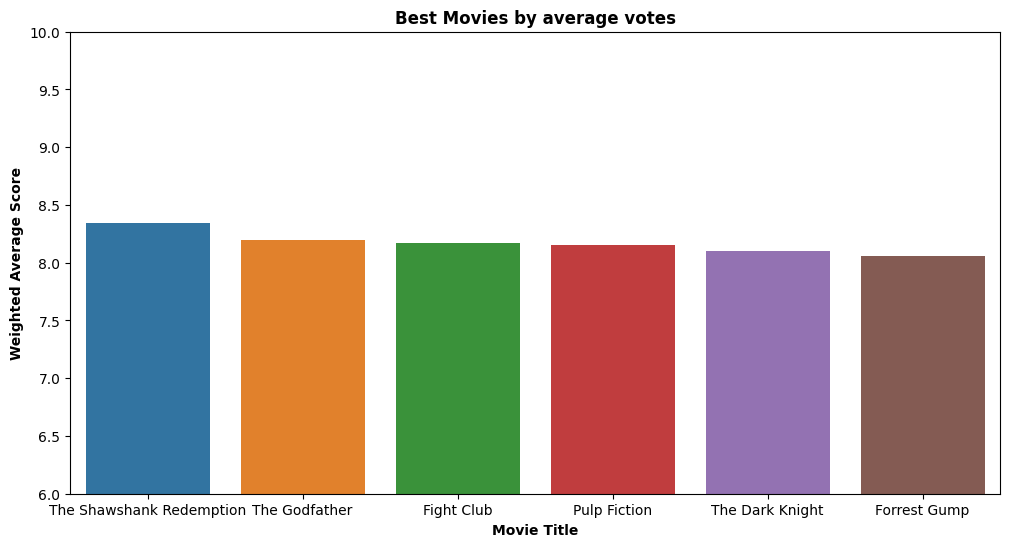

In [ ]:
weighted_average=movie_top.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(y=weighted_average['weighted_average'].head(6), x=weighted_average['original_title'].head(6), data=weighted_average)
plt.ylim(6, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.ylabel('Weighted Average Score', weight='bold')
plt.xlabel('Movie Title', weight='bold')

Text(0, 0.5, 'Movie Title')

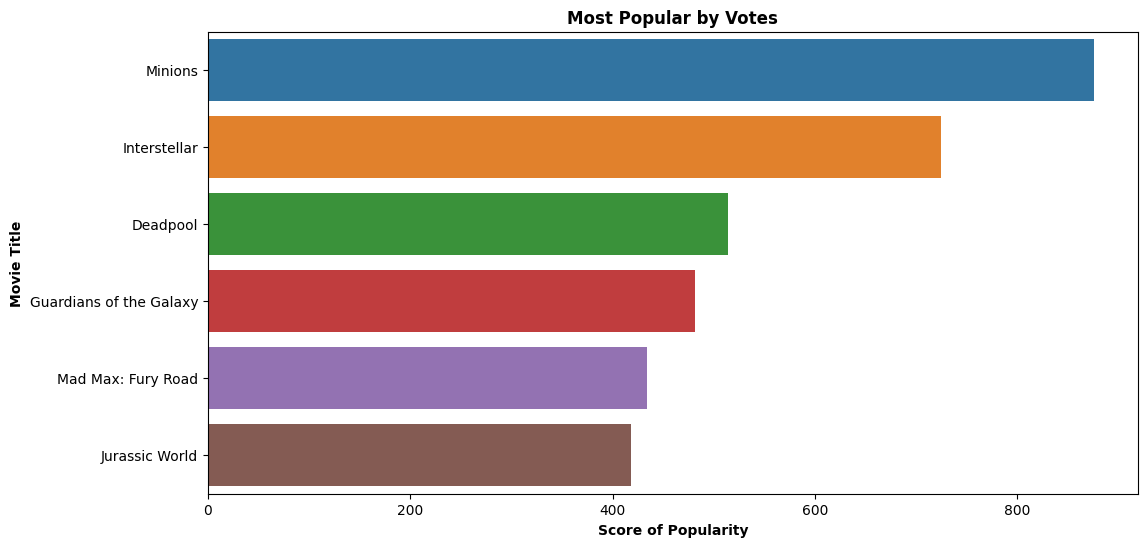

In [ ]:
popularity=movie_top.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['popularity'].head(6), y=popularity['original_title'].head(6), data=popularity)

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(movies[['weighted_average','popularity']])
movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])
movie_normalized_df.head()

,weighted_average,popularity
0,0.674322,0.171815
1,0.581388,0.158846
2,0.436251,0.122635
3,0.773043,0.128272
4,0.387725,0.050169


In [ ]:
movies[['normalized_weight_average','normalized_popularity']]= movie_normalized_df

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,movie_id,cast,crew,weighted_average,normalized_weight_average,normalized_popularity
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148029,0.674322,0.171815
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807666,0.581388,0.158846
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.276115,0.436251,0.122635
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.509585,0.773043,0.128272
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.098392,0.387725,0.050169


In [ ]:
movies['score'] = movies['normalized_weight_average'] * 0.5 + movies['normalized_popularity'] * 0.5 #average of both
movies_scored_df = movies.sort_values(['score'], ascending=False)
movies_scored_df[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(20)

,original_title,normalized_weight_average,normalized_popularity,score
95,Interstellar,0.906433,0.827162,0.866798
546,Minions,0.460609,1.000000,0.730305
94,Guardians of the Galaxy,0.851866,0.549462,0.700664
788,Deadpool,0.725203,0.587690,0.656446
127,Mad Max: Fury Road,0.670957,0.495989,0.583473
1887,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934986,0.213941,0.574464
3872,Whiplash,0.916432,0.219887,0.568159
3342,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953820,0.167611,0.560716


Text(0, 0.5, 'Movie Title')

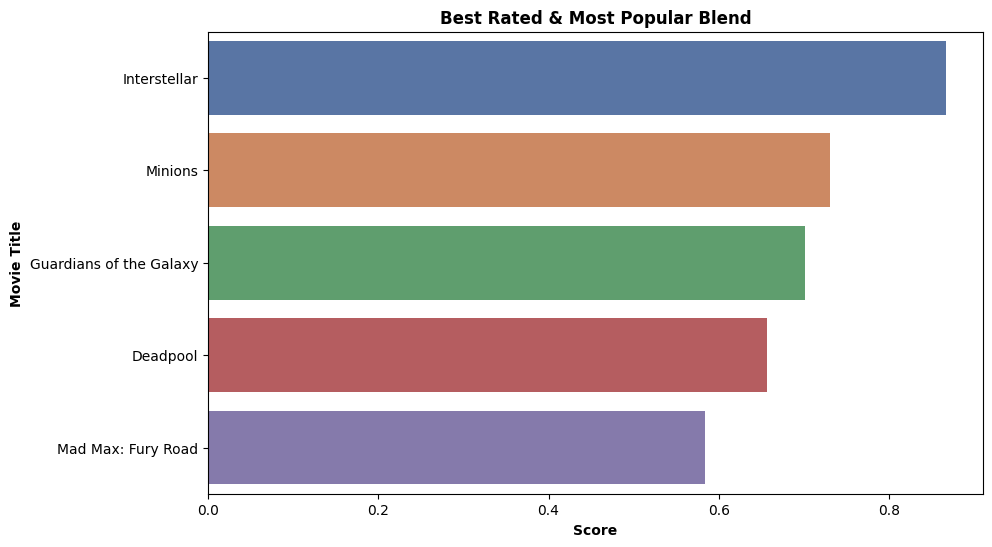

In [ ]:
scored_df = movies.sort_values('score', ascending=False)

plt.figure(figsize=(10,6))

ax = sns.barplot(x=scored_df['score'].head(5), y=scored_df['original_title'].head(5), data=scored_df, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')


In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,movie_id,cast,crew,weighted_average,normalized_weight_average,normalized_popularity,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148029,0.674322,0.171815,0.423068
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807666,0.581388,0.158846,0.370117
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.276115,0.436251,0.122635,0.279443
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.509585,0.773043,0.128272,0.450658
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.098392,0.387725,0.050169,0.218947


In [ ]:
## Features in our system- Genre,id,keywords,title,overview,cast,crew

movie_df = movies[['movie_id','title','genres','cast','crew','keywords','overview','original_language','score']]
movie_df.head(2)

,movie_id,title,genres,cast,crew,keywords,overview,original_language,score
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",en,0.423068
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",en,0.370117


In [ ]:
movie_df.isna().sum()

movie_id             0
title                0
genres               0
cast                 0
crew                 0
keywords             0
overview             3
original_language    0
score                0
dtype: int64

In [ ]:
## dropping missing vals
movie_df.dropna(inplace=True)

<ipython-input-24-2d5d40b2beb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.dropna(inplace=True)


In [ ]:
movie_df.isnull().sum()

movie_id             0
title                0
genres               0
cast                 0
crew                 0
keywords             0
overview             0
original_language    0
score                0
dtype: int64

In [ ]:
## dropping missing vals
movie_df.dropna(inplace=True)

<ipython-input-26-2d5d40b2beb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df.dropna(inplace=True)


In [ ]:
movie_df.isnull().sum()

movie_id             0
title                0
genres               0
cast                 0
crew                 0
keywords             0
overview             0
original_language    0
score                0
dtype: int64

In [ ]:
## taking genre
import ast
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
            L.append(i['name'])
            break
    return L

## taking director from crew
import ast
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append(i['name'])
            break
    return L

##taking top 5 actors
def cast(obj):
    L=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter != 5:
            L.append(i['name'])
            counter+=1
        else:
            break
    return L

##taking keywords
def keywords(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [ ]:
movie_df['genres'] = movie_df['genres'].apply(convert)
movie_df['crew'] = movie_df['crew'].apply(fetch_director)
movie_df['cast'] = movie_df['cast'].apply(cast)
movie_df['keywords'] = movie_df['keywords'].apply(keywords)
# converting overview in list form
movie_df['overview'] = movie_df['overview'].apply(lambda x: x.split())

movie_df.head(2)

<ipython-input-29-c5be88a08749>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['genres'] = movie_df['genres'].apply(convert)
<ipython-input-29-c5be88a08749>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['crew'] = movie_df['crew'].apply(fetch_director)
<ipython-input-29-c5be88a08749>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,movie_id,title,genres,cast,crew,keywords,overview,original_language,score
0,19995,Avatar,[Action],"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...",en,0.423068
1,285,Pirates of the Caribbean: At World's End,[Adventure],"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],"[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...",en,0.370117


In [ ]:
### Removing spaces

movie_df['crew'] = movie_df['crew'].apply(lambda x:[i.replace(" ","") for i in x])
movie_df['genres'] = movie_df['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movie_df['keywords'] = movie_df['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movie_df['cast'] = movie_df['cast'].apply(lambda x:[i.replace(" ","") for i in x])

<ipython-input-30-76bc0eb298c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['crew'] = movie_df['crew'].apply(lambda x:[i.replace(" ","") for i in x])
<ipython-input-30-76bc0eb298c7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['genres'] = movie_df['genres'].apply(lambda x:[i.replace(" ","") for i in x])
<ipython-input-30-76bc0eb298c7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [ ]:
movie_df.head(5)

,movie_id,title,genres,cast,crew,keywords,overview,original_language,score
0,19995,Avatar,[Action],"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",en,0.423068
1,285,Pirates of the Caribbean: At World's End,[Adventure],"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",en,0.370117
2,206647,Spectre,[Action],"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],"[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...",en,0.279443
3,49026,The Dark Knight Rises,[Action],"[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],"[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...",en,0.450658
4,49529,John Carter,[Action],"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],"[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",en,0.218947


In [ ]:
movie_df['tags'] = movie_df['overview']+movie_df['genres']+movie_df['keywords']+movie_df['cast']+movie_df['crew']

<ipython-input-31-27da33499e27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['tags'] = movie_df['overview']+movie_df['genres']+movie_df['keywords']+movie_df['cast']+movie_df['crew']


In [ ]:
new_df = movie_df[['movie_id','title','tags','score']]
new_df.head(2)

,movie_id,title,tags,score
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",0.423068
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",0.370117


In [ ]:
##converting it into string
new_df['tags'] = new_df['tags'].apply(lambda x : " ".join(x))

<ipython-input-33-70b4420d2fdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x : " ".join(x))


In [ ]:
new_df.head(2)


,movie_id,title,tags,score
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",0.423068
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",0.370117


In [ ]:
## converting tags to lower
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

<ipython-input-35-cd24d8e918ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
allstopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
##Removing Stopwords from tags
new_df['tags'] = new_df['tags'].apply(lambda x: ' '.join(t for t in x.split() if t not in allstopwords))

<ipython-input-37-dade3e89d2fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: ' '.join(t for t in x.split() if t not in allstopwords))


In [ ]:
new_df.head()

,movie_id,title,tags,score
0,19995,Avatar,"22nd century, paraplegic marine dispatched moo...",0.423068
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed dead, come bac...",0.370117
2,206647,Spectre,cryptic message bond’s past sends trail uncove...,0.279443
3,49026,The Dark Knight Rises,"following death district attorney harvey dent,...",0.450658
4,49529,John Carter,"john carter war-weary, former military captain...",0.218947


In [ ]:
from nltk.stem.snowball import SnowballStemmer

#the stemmer requires a language parameter
snow_stemmer = SnowballStemmer(language='english')

In [ ]:
## Stemming
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join([snow_stemmer.stem(word) for word in x.split()]))

<ipython-input-40-692c09908d24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join([snow_stemmer.stem(word) for word in x.split()]))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
vectors = tfidf.fit_transform(new_df['tags']).toarray()
vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
vectors.shape

(4806, 5000)

In [ ]:
new_df.head()

,movie_id,title,tags,score
0,19995,Avatar,"22nd century, parapleg marin dispatch moon pan...",0.423068
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ dead, come back ...",0.370117
2,206647,Spectre,cryptic messag bond past send trail uncov sini...,0.279443
3,49026,The Dark Knight Rises,"follow death district attorney harvey dent, ba...",0.450658
4,49529,John Carter,"john carter war-weary, former militari captain...",0.218947


In [ ]:
import numpy as np

# Define two vectors

# Calculate the dot product of the two vectors
dot_product = np.dot(vectors, vectors)

# Calculate the magnitudes (Euclidean norms) of the vectors


# Calculate the cosine similarity
cosine_similarity = dot_product / (magnitude_a * magnitude_b)

print("Cosine Similarity:", cosine_similarity)

ValueError: ignored

# rbf kernel

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

# Compute the sigmoid kernel
rbf = rbf_kernel(vectors, vectors)
rbf

array([[1.        , 0.99960008, 0.99961042, ..., 0.99960798, 0.99960008,
        0.99960008],
       [0.99960008, 1.        , 0.99960525, ..., 0.99960553, 0.99960008,
        0.99960008],
       [0.99961042, 0.99960525, 1.        , ..., 0.99960687, 0.99960008,
        0.99960008],
       ...,
       [0.99960798, 0.99960553, 0.99960687, ..., 1.        , 0.99960845,
        0.99961142],
       [0.99960008, 0.99960008, 0.99960008, ..., 0.99960845, 1.        ,
        0.99961245],
       [0.99960008, 0.99960008, 0.99960008, ..., 0.99961142, 0.99961245,
        1.        ]])

In [ ]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies.index, index=movies['original_title']).drop_duplicates()

In [ ]:
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4804
Newlyweds                                   4805
Signed, Sealed, Delivered                   4806
Shanghai Calling                            4807
My Date with Drew                           4808
Length: 4809, dtype: int64

In [ ]:
import operator

def suggest_rbf(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = rbf[movie_index]
    score=new_df['score']
    # similarity = 1-distances
    df=pd.DataFrame(distances,columns=['similarity'])
    # df=pd.DataFrame(,)
    df=df.join(score)
    df['index'] = np.arange(len(df))
    # print("before sorting:" ,df)
    df.sort_values(['similarity', 'score'], ascending=[False, False],inplace=True)
    # print("after sorting:" ,df)
    df_sim=df[1:6]






    # movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:(x[1]))[1:6]

    # movies_list=[]
    # for i in 5:
    movies_list=df['index'].tolist()

#
    # print('movieslist: ',movies_list)
    counter=0
    for i in movies_list:
        if counter!=6:
            counter+=1
            if counter==1:
              print('Enter Movie: ',end="")
              print(new_df.iloc[i].title,end="\n\n")
              print(df_sim,end="\n\n")
              print('Recommendations: ')
              continue
            print(" ",new_df.iloc[i].title)
        else:
            break
    return df_sim

In [ ]:
df_rbf=suggest_rbf('Spectre')

Enter Movie: Spectre

      similarity     score  index
29      0.999717  0.348585     29
11      0.999715  0.255547     11
1346    0.999707  0.191724   1346
3289    0.999679  0.194196   3289
4077    0.999676  0.186673   4077

Recommendations: 
  Skyfall
  Quantum of Solace
  Never Say Never Again
  Restless
  From Russia with Love


,similarity,score,index
29,0.999717,0.348585,29
11,0.999715,0.255547,11
1346,0.999707,0.191724,1346
3289,0.999679,0.194196,3289
4077,0.999676,0.186673,4077


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['similarity'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['score'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['similarity'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['score'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_6, *[[['similarity', 'score'], ['score', 'index']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_7, *['level_0'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_8, *['similarity'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_9, *['score'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_11, *['level_0'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_12, *['similarity'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_13, *['score'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_14, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_15, *[[['level_0', 'similarity'], ['similarity', 'score'], ['score', 'index']]], **{})
chart

In [ ]:
df_rbf=suggest_rbf('Spectre')

Enter Movie: Spectre

      similarity     score  index
29      0.999717  0.348585     29
11      0.999715  0.255547     11
1346    0.999707  0.191724   1346
3289    0.999679  0.194196   3289
4077    0.999676  0.186673   4077

Recommendations: 
  Skyfall
  Quantum of Solace
  Never Say Never Again
  Restless
  From Russia with Love


In [ ]:
pip install tabulate

In [ ]:
from tabulate import tabulate

# Create a sample DataFrame
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35]}
df = pd.DataFrame(df_rbf)

# Convert the DataFrame to a text table
text_table = tabulate(df, headers='keys', tablefmt='pretty')

# Print or display the text table
print(text_table)

+------+--------------------+---------------------+--------+
|      |     similarity     |        score        | index  |
+------+--------------------+---------------------+--------+
|  29  | 0.9997172783091722 | 0.3485848548054616  |  29.0  |
|  11  | 0.9997153437724504 | 0.25554734914938476 |  11.0  |
| 1346 | 0.9997065718025475 | 0.19172413118754134 | 1346.0 |
| 3289 | 0.9996793667737924 | 0.19419591432351688 | 3289.0 |
| 4077 | 0.9996755114985003 | 0.18667294538941165 | 4077.0 |
+------+--------------------+---------------------+--------+


In [ ]:
latex_table = df_rbf.to_latex(index=False)
latex_table

<ipython-input-56-09b61ea649d8>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_rbf.to_latex(index=False)


'\\begin{tabular}{rrr}\n\\toprule\n similarity &    score &  index \\\\\n\\midrule\n   0.999717 & 0.348585 &     29 \\\\\n   0.999715 & 0.255547 &     11 \\\\\n   0.999707 & 0.191724 &   1346 \\\\\n   0.999679 & 0.194196 &   3289 \\\\\n   0.999676 & 0.186673 &   4077 \\\\\n\\bottomrule\n\\end{tabular}\n'

(0.0, 1.0, 0.0, 1.0)

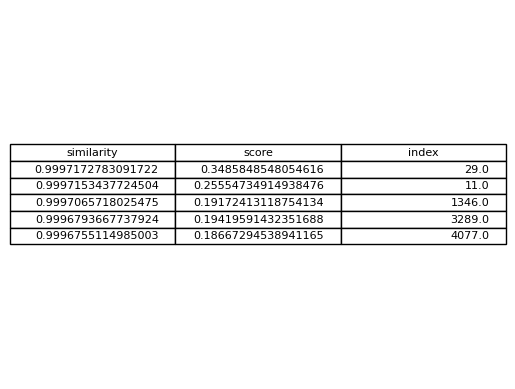

In [ ]:
import matplotlib.pyplot as plt

# Create a table visualization with matplotlib
plt.table(cellText=df_rbf.values, colLabels=df_rbf.columns, loc='center')
plt.axis('off')

........................**bold text**

In [ ]:
INDEX=df_rbf['index'].tolist()
for i in INDEX:
  print(new_df.iloc[i].title,end=" ")
  print(df_rbf['similarity'][i])




Skyfall 0.9997172783091722
Quantum of Solace 0.9997153437724504
Never Say Never Again 0.9997065718025475
Restless 0.9996793667737924
From Russia with Love 0.9996755114985003


In [ ]:
suggest_rbf('The Avengers')

Enter Movie: The Avengers

     similarity     score  index
7      0.999729  0.421554      7
26     0.999697  0.433668     26
126    0.999685  0.335950    126
169    0.999678  0.299613    169
31     0.999678  0.328030     31

Recommendations: 
  Avengers: Age of Ultron
  Captain America: Civil War
  Thor: The Dark World
  Captain America: The First Avenger
  Iron Man 3


,similarity,score,index
7,0.999729,0.421554,7
26,0.999697,0.433668,26
126,0.999685,0.335950,126
169,0.999678,0.299613,169
31,0.999678,0.328030,31


In [ ]:
suggest_rbf('John Carter')

Enter Movie: John Carter

      similarity     score  index
1257    0.999679  0.160384   1257
4166    0.999676  0.204397   4166
3910    0.999666  0.312175   3910
778     0.999662  0.145600    778
2936    0.999658  0.171924   2936

Recommendations: 
  Get Carter
  The Marine 4: Moving Target
  Spaced Invaders
  Meet Dave
  Raising Cain


,similarity,score,index
1257,0.999679,0.160384,1257
4166,0.999676,0.204397,4166
3910,0.999666,0.312175,3910
778,0.999662,0.145600,778
2936,0.999658,0.171924,2936


In [ ]:
from sklearn.metrics.pairwise import linear_kernel
linear = linear_kernel(vectors, vectors)
linear

array([[1.        , 0.        , 0.02586695, ..., 0.01975055, 0.        ,
        0.        ],
       [0.        , 1.        , 0.01292128, ..., 0.01364132, 0.        ,
        0.        ],
       [0.02586695, 0.01292128, 1.        , ..., 0.01699273, 0.        ,
        0.        ],
       ...,
       [0.01975055, 0.01364132, 0.01699273, ..., 1.        , 0.02094358,
        0.02836389],
       [0.        , 0.        , 0.        , ..., 0.02094358, 1.        ,
        0.03093689],
       [0.        , 0.        , 0.        , ..., 0.02836389, 0.03093689,
        1.        ]])

In [ ]:
import operator

def suggest_linear(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = linear[movie_index]
    score=new_df['score']
    # similarity = 1-distances
    df=pd.DataFrame(distances,columns=['similarity'])
    # df=pd.DataFrame(,)
    df=df.join(score)
    df['index'] = np.arange(len(df))
    # print("before sorting:" ,df)
    df.sort_values(['similarity', 'score'], ascending=[False, False],inplace=True)
    # print("after sorting:" ,df)
    df_sim=df[1:6]






    # movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:(x[1]))[1:6]

    # movies_list=[]
    # for i in 5:
    movies_list=df['index'].tolist()

#
    # print('movieslist: ',movies_list)
    counter=0
    for i in movies_list:
        if counter!=6:
            counter+=1
            if counter==1:
              print('Enter Movie: ',end="")
              print(new_df.iloc[i].title,end="\n\n")
              print(df_sim,end="\n\n")
              print('Recommendations: ')
              continue
            print(" ",new_df.iloc[i].title)
        else:
            break
    return df_sim

In [ ]:
df_linear=suggest_linear('Spectre')

Enter Movie: Spectre

      similarity     score  index
29      0.293096  0.348585     29
11      0.288258  0.255547     11
1346    0.266322  0.191724   1346
3289    0.198288  0.194196   3289
4077    0.188647  0.186673   4077

Recommendations: 
  Skyfall
  Quantum of Solace
  Never Say Never Again
  Restless
  From Russia with Love


In [ ]:
from sklearn.metrics.pairwise import polynomial_kernel
degree = 3  # You can specify the degree of the polynomial
poly = polynomial_kernel(vectors, vectors, degree=degree)
poly

array([[1.00060012, 1.        , 1.00001552, ..., 1.00001185, 1.        ,
        1.        ],
       [1.        , 1.00060012, 1.00000775, ..., 1.00000818, 1.        ,
        1.        ],
       [1.00001552, 1.00000775, 1.00060012, ..., 1.0000102 , 1.        ,
        1.        ],
       ...,
       [1.00001185, 1.00000818, 1.0000102 , ..., 1.00060012, 1.00001257,
        1.00001702],
       [1.        , 1.        , 1.        , ..., 1.00001257, 1.00060012,
        1.00001856],
       [1.        , 1.        , 1.        , ..., 1.00001702, 1.00001856,
        1.00060012]])

In [ ]:
import operator

def suggest_poly(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = poly[movie_index]
    score=new_df['score']
    # similarity = 1-distances
    df=pd.DataFrame(distances,columns=['similarity'])
    # df=pd.DataFrame(,)
    df=df.join(score)
    df['index'] = np.arange(len(df))
    # print("before sorting:" ,df)
    df.sort_values(['similarity', 'score'], ascending=[False, False],inplace=True)
    # print("after sorting:" ,df)
    # movies_list=[]
    # for i in 5:
    movies_list=df['index'].tolist()
    for i in movies_list:
        df['similarity'][i]=df['similarity'][i]-0.00060012
    df_sim=df[1:6]






    # movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:(x[1]))[1:6]



    # print('movieslist: ',movies_list)

    counter=0
    for i in movies_list:
        df['similarity'][i]=df['similarity'][i]-0.00060012
        if counter!=6:
            counter+=1
            if counter==1:
              print('Enter Movie: ',end="")
              print(new_df.iloc[i].title,end="\n\n")
              print(df_sim,end="\n\n")
              print('Recommendations: ')
              continue
            print(" ",new_df.iloc[i].title)
        else:
            break
    return df_sim

In [ ]:
df_poly=suggest_poly('Spectre')

<ipython-input-65-53604eed9643>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['similarity'][i]=df['similarity'][i]-0.00060012


Enter Movie: Spectre

      similarity     score  index
29      0.999576  0.348585     29
11      0.999573  0.255547     11
1346    0.999560  0.191724   1346
3289    0.999519  0.194196   3289
4077    0.999513  0.186673   4077

Recommendations: 
  Skyfall
  Quantum of Solace
  Never Say Never Again
  Restless
  From Russia with Love


<ipython-input-65-53604eed9643>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['similarity'][i]=df['similarity'][i]-0.00060012
<ipython-input-65-53604eed9643>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['similarity'][i]=df['similarity'][i]-0.00060012


In [ ]:
from sklearn.metrics.pairwise import laplacian_kernel
gamma = 0.1  # You can specify the gamma parameter
laplacian = laplacian_kernel(vectors, vectors, gamma=gamma)
laplacian

array([[1.        , 0.33811971, 0.37091472, ..., 0.3411227 , 0.34523649,
        0.3465369 ],
       [0.33811971, 1.        , 0.33697346, ..., 0.31554102, 0.32057815,
        0.32178567],
       [0.37091472, 0.33697346, 1.        , ..., 0.33187761, 0.33668202,
        0.33795021],
       ...,
       [0.3411227 , 0.31554102, 0.33187761, ..., 1.        , 0.32814639,
        0.33088099],
       [0.34523649, 0.32057815, 0.33668202, ..., 0.32814639, 1.        ,
        0.34819729],
       [0.3465369 , 0.32178567, 0.33795021, ..., 0.33088099, 0.34819729,
        1.        ]])

In [ ]:
import operator

def suggest_lap(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = laplacian[movie_index]
    score=new_df['score']
    # similarity = 1-distances
    df=pd.DataFrame(distances,columns=['similarity'])
    # df=pd.DataFrame(,)
    df=df.join(score)
    df['index'] = np.arange(len(df))
    # print("before sorting:" ,df)
    df.sort_values(['similarity', 'score'], ascending=[False, False],inplace=True)
    # print("after sorting:" ,df)
    df_sim=df[1:6]






    # movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:(x[1]))[1:6]

    # movies_list=[]
    # for i in 5:
    movies_list=df['index'].tolist()

#
    # print('movieslist: ',movies_list)
    counter=0
    for i in movies_list:
        if counter!=6:
            counter+=1
            if counter==1:
              print('Enter Movie: ',end="")
              print(new_df.iloc[i].title,end="\n\n")
              print(df_sim,end="\n\n")
              print('Recommendations: ')
              continue
            print(" ",new_df.iloc[i].title)
        else:
            break
    return df_sim

In [ ]:
df_lap=suggest_lap('Spectre')

Enter Movie: Spectre

      similarity     score  index
4405    0.541963  0.197397   4405
4641    0.518708  0.192863   4641
4461    0.513345  0.192262   4461
3527    0.508351  0.190517   3527
3998    0.482175  0.210968   3998

Recommendations: 
  The Helix... Loaded
  Amidst the Devil's Wings
  Harrison Montgomery
  Khiladi 786
  Sardaarji


In [ ]:
from sklearn.metrics.pairwise import chi2_kernel
chi2 = chi2_kernel(vectors, vectors)
chi2

array([[1.00000000e+00, 1.95301199e-05, 4.97115867e-05, ...,
        2.16993086e-05, 2.40528724e-05, 2.49743863e-05],
       [1.95301199e-05, 1.00000000e+00, 1.90705528e-05, ...,
        9.86685690e-06, 1.14640787e-05, 1.19032906e-05],
       [4.97115867e-05, 1.90705528e-05, 1.00000000e+00, ...,
        1.65382598e-05, 1.87154073e-05, 1.94324322e-05],
       ...,
       [2.16993086e-05, 9.86685690e-06, 1.65382598e-05, ...,
        1.00000000e+00, 1.44825435e-05, 1.59485207e-05],
       [2.40528724e-05, 1.14640787e-05, 1.87154073e-05, ...,
        1.44825435e-05, 1.00000000e+00, 2.66496455e-05],
       [2.49743863e-05, 1.19032906e-05, 1.94324322e-05, ...,
        1.59485207e-05, 2.66496455e-05, 1.00000000e+00]])

In [ ]:
import operator

def suggest_chi2(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = chi2[movie_index]
    score=new_df['score']
    # similarity = 1-distances
    df=pd.DataFrame(distances,columns=['similarity'])
    # df=pd.DataFrame(,)
    df=df.join(score)
    df['index'] = np.arange(len(df))
    # print("before sorting:" ,df)
    df.sort_values(['similarity', 'score'], ascending=[False, False],inplace=True)
    # print("after sorting:" ,df)
    df_sim=df[1:6]






    # movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:(x[1]))[1:6]

    # movies_list=[]
    # for i in 5:
    movies_list=df['index'].tolist()

#
    # print('movieslist: ',movies_list)
    counter=0
    for i in movies_list:
        if counter!=6:
            counter+=1
            if counter==1:
              print('Enter Movie: ',end="")
              print(new_df.iloc[i].title,end="\n\n")
              print(df_sim,end="\n\n")
              print('Recommendations: ')
              continue
            print(" ",new_df.iloc[i].title)
        else:
            break
    return df_sim

In [ ]:
df_chi2=suggest_chi2('Spectre')

Enter Movie: Spectre

      similarity     score  index
4405    0.002535  0.197397   4405
4641    0.001410  0.192863   4641
4461    0.001271  0.192262   4461
3527    0.001265  0.190517   3527
3998    0.000679  0.210968   3998

Recommendations: 
  The Helix... Loaded
  Amidst the Devil's Wings
  Harrison Montgomery
  Khiladi 786
  Sardaarji


In [ ]:
import numpy as np
from google.colab import autoviz
from matplotlib import pyplot as plt  # Import plt

def value_plot(df, y, figscale=1, dpi=300):
    plt.figure(dpi=dpi)  # Set the DPI for the entire figure
    df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.tight_layout()
    return autoviz.MplChart.from_current_mpl_state()  # Create MplChart without specifying dpi

chart = value_plot(_df_7, *['similarity'], **{'dpi': 300})  # Specify the desired DPI here
chart

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(vectors, vectors)
sig

array([[0.76167814, 0.76159416, 0.76159633, ..., 0.76159581, 0.76159416,
        0.76159416],
       [0.76159416, 0.76167814, 0.76159524, ..., 0.7615953 , 0.76159416,
        0.76159416],
       [0.76159633, 0.76159524, 0.76167814, ..., 0.76159558, 0.76159416,
        0.76159416],
       ...,
       [0.76159581, 0.7615953 , 0.76159558, ..., 0.76167814, 0.76159592,
        0.76159654],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159592, 0.76167814,
        0.76159675],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159654, 0.76159675,
        0.76167814]])

In [ ]:
import operator

def suggest_sig(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = sig[movie_index]
    score=new_df['score']
    # similarity = 1-distances
    df=pd.DataFrame(distances,columns=['similarity'])
    # df=pd.DataFrame(,)
    df=df.join(score)
    df['index'] = np.arange(len(df))
    # print("before sorting:" ,df)
    df.sort_values(['similarity', 'score'], ascending=[False, False],inplace=True)
    # print("after sorting:" ,df)
    df_sim=df[1:6]






    # movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:(x[1]))[1:6]

    # movies_list=[]
    # for i in 5:
    movies_list=df['index'].tolist()

#
    # print('movieslist: ',movies_list)
    counter=0
    for i in movies_list:
        if counter!=6:
            counter+=1
            if counter==1:
              print('Enter Movie: ',end="")
              print(new_df.iloc[i].title,end="\n\n")
              print(df_sim,end="\n\n")
              print('Recommendations: ')
              continue
            print(" ",new_df.iloc[i].title)
        else:
            break
    return df_sim

In [ ]:
suggest_rbf('Spectre')

Enter Movie: Spectre

      similarity     score  index
29      0.999717  0.348585     29
11      0.999715  0.255547     11
1346    0.999707  0.191724   1346
3289    0.999679  0.194196   3289
4077    0.999676  0.186673   4077

Recommendations: 
  Skyfall
  Quantum of Solace
  Never Say Never Again
  Restless
  From Russia with Love


,similarity,score,index
29,0.999717,0.348585,29
11,0.999715,0.255547,11
1346,0.999707,0.191724,1346
3289,0.999679,0.194196,3289
4077,0.999676,0.186673,4077


In [ ]:
suggest_linear('Spectre')

Enter Movie: Spectre

      similarity     score  index
29      0.293096  0.348585     29
11      0.288258  0.255547     11
1346    0.266322  0.191724   1346
3289    0.198288  0.194196   3289
4077    0.188647  0.186673   4077

Recommendations: 
  Skyfall
  Quantum of Solace
  Never Say Never Again
  Restless
  From Russia with Love


,similarity,score,index
29,0.293096,0.348585,29
11,0.288258,0.255547,11
1346,0.266322,0.191724,1346
3289,0.198288,0.194196,3289
4077,0.188647,0.186673,4077


In [ ]:
suggest_poly('Spectre')

<ipython-input-65-53604eed9643>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['similarity'][i]=df['similarity'][i]-0.00060012


Enter Movie: Spectre

      similarity     score  index
29      0.999576  0.348585     29
11      0.999573  0.255547     11
1346    0.999560  0.191724   1346
3289    0.999519  0.194196   3289
4077    0.999513  0.186673   4077

Recommendations: 
  Skyfall
  Quantum of Solace
  Never Say Never Again
  Restless
  From Russia with Love


<ipython-input-65-53604eed9643>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['similarity'][i]=df['similarity'][i]-0.00060012
<ipython-input-65-53604eed9643>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['similarity'][i]=df['similarity'][i]-0.00060012


,similarity,score,index
29,0.998976,0.348585,29
11,0.998973,0.255547,11
1346,0.998960,0.191724,1346
3289,0.998919,0.194196,3289
4077,0.998913,0.186673,4077


In [ ]:
suggest_sig('Spectre')

Enter Movie: Spectre

      similarity     score  index
29      0.761619  0.348585     29
11      0.761618  0.255547     11
1346    0.761617  0.191724   1346
3289    0.761611  0.194196   3289
4077    0.761610  0.186673   4077

Recommendations: 
  Skyfall
  Quantum of Solace
  Never Say Never Again
  Restless
  From Russia with Love


,similarity,score,index
29,0.761619,0.348585,29
11,0.761618,0.255547,11
1346,0.761617,0.191724,1346
3289,0.761611,0.194196,3289
4077,0.761610,0.186673,4077


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_16, *['similarity'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_17, *['score'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_18, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_19, *['similarity'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_20, *['score'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_21, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_22, *[[['similarity', 'score'], ['score', 'index']]], **{})
chart

In [ ]:
suggest_lap('Spectre')

Enter Movie: Spectre

      similarity     score  index
4405    0.541963  0.197397   4405
4641    0.518708  0.192863   4641
4461    0.513345  0.192262   4461
3527    0.508351  0.190517   3527
3998    0.482175  0.210968   3998

Recommendations: 
  The Helix... Loaded
  Amidst the Devil's Wings
  Harrison Montgomery
  Khiladi 786
  Sardaarji


,similarity,score,index
4405,0.541963,0.197397,4405
4641,0.518708,0.192863,4641
4461,0.513345,0.192262,4461
3527,0.508351,0.190517,3527
3998,0.482175,0.210968,3998


In [ ]:
suggest_chi2('Spectre')

Enter Movie: Spectre

      similarity     score  index
4405    0.002535  0.197397   4405
4641    0.001410  0.192863   4641
4461    0.001271  0.192262   4461
3527    0.001265  0.190517   3527
3998    0.000679  0.210968   3998

Recommendations: 
  The Helix... Loaded
  Amidst the Devil's Wings
  Harrison Montgomery
  Khiladi 786
  Sardaarji


,similarity,score,index
4405,0.002535,0.197397,4405
4641,0.001410,0.192863,4641
4461,0.001271,0.192262,4461
3527,0.001265,0.190517,3527
3998,0.000679,0.210968,3998


In [ ]:
suggest_rbf('The Avengers')

Enter Movie: The Avengers

     similarity     score  index
7      0.999729  0.421554      7
26     0.999697  0.433668     26
126    0.999685  0.335950    126
169    0.999678  0.299613    169
31     0.999678  0.328030     31

Recommendations: 
  Avengers: Age of Ultron
  Captain America: Civil War
  Thor: The Dark World
  Captain America: The First Avenger
  Iron Man 3


,similarity,score,index
7,0.999729,0.421554,7
26,0.999697,0.433668,26
126,0.999685,0.335950,126
169,0.999678,0.299613,169
31,0.999678,0.328030,31


In [ ]:
suggest_poly('The Avengers')

<ipython-input-65-53604eed9643>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['similarity'][i]=df['similarity'][i]-0.00060012


Enter Movie: The Avengers

     similarity     score  index
7      0.999593  0.421554      7
26     0.999546  0.433668     26
126    0.999528  0.335950    126
169    0.999517  0.299613    169
31     0.999517  0.328030     31

Recommendations: 
  Avengers: Age of Ultron
  Captain America: Civil War
  Thor: The Dark World
  Captain America: The First Avenger
  Iron Man 3


<ipython-input-65-53604eed9643>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['similarity'][i]=df['similarity'][i]-0.00060012
<ipython-input-65-53604eed9643>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['similarity'][i]=df['similarity'][i]-0.00060012


,similarity,score,index
7,0.998993,0.421554,7
26,0.998946,0.433668,26
126,0.998928,0.335950,126
169,0.998917,0.299613,169
31,0.998916,0.328030,31


In [ ]:
suggest_sig("The Avengers")

Enter Movie: The Avengers

     similarity     score  index
7      0.761621  0.421554      7
26     0.761615  0.433668     26
126    0.761612  0.335950    126
169    0.761611  0.299613    169
31     0.761610  0.328030     31

Recommendations: 
  Avengers: Age of Ultron
  Captain America: Civil War
  Thor: The Dark World
  Captain America: The First Avenger
  Iron Man 3


,similarity,score,index
7,0.761621,0.421554,7
26,0.761615,0.433668,26
126,0.761612,0.335950,126
169,0.761611,0.299613,169
31,0.761610,0.328030,31


In [ ]:
suggest_linear('The Avengers')

Enter Movie: The Avengers

     similarity     score  index
7      0.321912  0.421554      7
26     0.243611  0.433668     26
126    0.213069  0.335950    126
169    0.195045  0.299613    169
31     0.194485  0.328030     31

Recommendations: 
  Avengers: Age of Ultron
  Captain America: Civil War
  Thor: The Dark World
  Captain America: The First Avenger
  Iron Man 3


,similarity,score,index
7,0.321912,0.421554,7
26,0.243611,0.433668,26
126,0.213069,0.335950,126
169,0.195045,0.299613,169
31,0.194485,0.328030,31


In [ ]:
suggest_lap('The Avengers')

Enter Movie: The Avengers

      similarity     score  index
4405    0.490248  0.197397   4405
4641    0.477572  0.192863   4641
4461    0.472634  0.192262   4461
3527    0.459843  0.190517   3527
3998    0.443936  0.210968   3998

Recommendations: 
  The Helix... Loaded
  Amidst the Devil's Wings
  Harrison Montgomery
  Khiladi 786
  Sardaarji


,similarity,score,index
4405,0.490248,0.197397,4405
4641,0.477572,0.192863,4641
4461,0.472634,0.192262,4461
3527,0.459843,0.190517,3527
3998,0.443936,0.210968,3998


In [ ]:
suggest_chi2('The Avengers')

Enter Movie: The Avengers

      similarity     score  index
4405    0.000802  0.197397   4405
4641    0.000617  0.192863   4641
4461    0.000556  0.192262   4461
3527    0.000423  0.190517   3527
3998    0.000297  0.210968   3998

Recommendations: 
  The Helix... Loaded
  Amidst the Devil's Wings
  Harrison Montgomery
  Khiladi 786
  Sardaarji


,similarity,score,index
4405,0.000802,0.197397,4405
4641,0.000617,0.192863,4641
4461,0.000556,0.192262,4461
3527,0.000423,0.190517,3527
3998,0.000297,0.210968,3998
